# IMPORTAMOS LAS LIBRERIAS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CARGAMOS EL DATASET CONSUMO DE COMIDA CON PANDAS

In [ ]:
df_consumo = pd.read_excel('2. Data Set Consumo Comida - ORANGE 3 .xlsx')
df_consumo

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
0,3900,37.6,4.0,0.0
1,5300,51.5,5.0,1.0
2,4300,51.6,4.0,0.0
3,4900,46.8,5.0,0.0
4,6400,53.8,6.0,1.0
5,7300,62.6,7.0,1.0
6,4900,54.3,5.0,0.0
7,5300,43.7,4.0,0.0
8,6100,60.8,5.0,1.0
9,6400,51.3,6.0,1.0


In [ ]:
df_consumo.columns #Ver las columnas del dataset

Index(['Gasto de Comida', 'Ingresos x 1000', 'Tamaño de Familia', 'Hijos'], dtype='object')

Observamos que hay algunos valores nulos en los campos Ingresos x 1000 , Tamaño de Familias e Hijos

In [ ]:
#Por si tenemos un dataset muy largo , esto es una buena forma de saber cuantos valores nulos hay en cada campo
df_consumo.isnull().sum()

Gasto de Comida      0
Ingresos x 1000      2
Tamaño de Familia    1
Hijos                1
dtype: int64

Para estos casos que hay valores nulos podemos eliminar los datos que tienen valores nulos , eliminar la columna que tiene valor nulo o convertir estos valores nulos en la media , promedio , mediana de sus otras variables de la columna.

En este caso aplicaremos la mediana a los campos que tienen valores nulos

# ELIMINAR VALORES NULO

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #usamos la mediana
df_consumo[['Gasto de Comida', 'Ingresos x 1000', 'Tamaño de Familia', 'Hijos']] = imputer.fit_transform(df_consumo[['Gasto de Comida', 'Ingresos x 1000', 'Tamaño de Familia', 'Hijos']])
df_consumo

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
0,3900.0,37.6,4.0,0.0
1,5300.0,51.5,5.0,1.0
2,4300.0,51.6,4.0,0.0
3,4900.0,46.8,5.0,0.0
4,6400.0,53.8,6.0,1.0
5,7300.0,62.6,7.0,1.0
6,4900.0,54.3,5.0,0.0
7,5300.0,43.7,4.0,0.0
8,6100.0,60.8,5.0,1.0
9,6400.0,51.3,6.0,1.0


Ahora el dataset esta sin valores nulos , listo para poder explorar los datos. Pero... Nos damos cuenta que entre los datos de las diferentes columnas , las escalas no son iguales.

Cuando vemos esto , tenemos 2 métodos : Normalización y Estandarización.
En este caso aplicaremos Normalización

# Normalizando

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_consumo[['Gasto de Comida', 'Ingresos x 1000', 'Tamaño de Familia', 'Hijos']] = scaler.fit_transform(df_consumo[['Gasto de Comida', 'Ingresos x 1000', 'Tamaño de Familia', 'Hijos']])
df_consumo

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
0,0.197064,0.077491,0.000000,0.0
1,0.518238,0.590406,0.333333,1.0
2,0.288828,0.594096,0.000000,0.0
3,0.426474,0.416974,0.333333,0.0
4,0.770590,0.675277,0.666667,1.0
5,0.977059,1.000000,1.000000,1.0
6,0.426474,0.693727,0.333333,0.0
7,0.518238,0.302583,0.000000,0.0
8,0.701766,0.933579,0.333333,1.0
9,0.770590,0.583026,0.666667,1.0


Ahora tenemos nuestro dataframe normalizado

# EXPLORANDO DATOS

## TIPO DE DATOS DE COLUMNA

In [ ]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gasto de Comida    16 non-null     float64
 1   Ingresos x 1000    16 non-null     float64
 2   Tamaño de Familia  16 non-null     float64
 3   Hijos              16 non-null     float64
dtypes: float64(4)
memory usage: 640.0 bytes


## DATOS ESTADISTICOS

In [ ]:
df_consumo.describe()

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
count,16.000000,16.000000,16.000000,16.000000
mean,0.597758,0.531365,0.395833,0.562500
std,0.284834,0.279886,0.327024,0.512348
min,0.000000,0.000000,0.000000,0.000000
25%,0.426474,0.388376,0.250000,0.000000
50%,0.610002,0.586716,0.333333,1.000000
75%,0.789287,0.679889,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000


## CORRELACION

In [ ]:
df_consumo_corr = df_consumo.corr()
df_consumo_corr

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
Gasto de Comida,1.000000,0.646022,0.483497,0.387803
Ingresos x 1000,0.646022,1.000000,0.238309,0.130379
Tamaño de Familia,0.483497,0.238309,1.000000,0.704600
Hijos,0.387803,0.130379,0.704600,1.000000


## VER DE MANERA ESPECIFICA LA CORRELACION DE LA VARIABLE DEPENDIENTE "GASTO DE COMIDA" CON LAS OTRAS VARIABLES INDEPENDIENTES Y EN SI MISMA

In [ ]:
df_consumo_corr['Gasto de Comida'].sort_values(ascending = False) # Lo ordenamos de mayor a menor

Gasto de Comida      1.000000
Ingresos x 1000      0.646022
Tamaño de Familia    0.483497
Hijos                0.387803
Name: Gasto de Comida, dtype: float64

## VER DE MANERA GRÁFICA LA CORRELACIÓN ENTRE LA VARIABLE DEPENDIENTE Y LAS VARIABLES INDEPENDIENTES

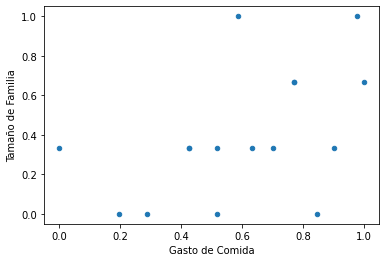

In [ ]:
#Gasto de Comida y Tamaño de Familia
df_consumo.plot(kind = 'scatter' , x = 'Gasto de Comida' , y = 'Tamaño de Familia')
plt.show()

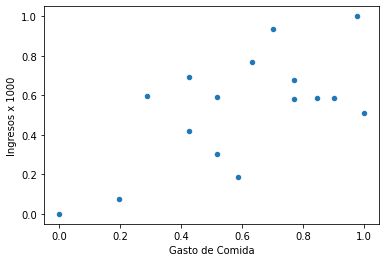

In [ ]:
#Gasto de Comida y Ingresos x 1000
df_consumo.plot(kind = 'scatter' , x = 'Gasto de Comida' , y = 'Ingresos x 1000')
plt.show()

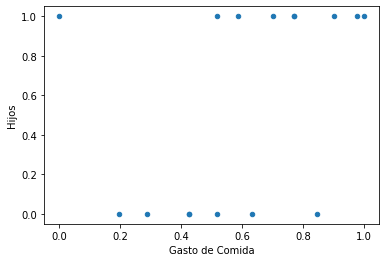

In [ ]:
#Gasto de Comida e Hijos
df_consumo.plot(kind = 'scatter' , x = 'Gasto de Comida' , y = 'Hijos')
plt.show()

# APLICANDO LA REGRESIÓN LINEAL

In [ ]:
#Importamos las librerias
from sklearn import linear_model
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

## CREAMOS UN MODELO LLAMADO "regresion_model"

In [ ]:
regresion_model = linear_model.LinearRegression()

In [ ]:
val_inde = ['Ingresos x 1000', 'Tamaño de Familia', 'Hijos'] #Variables independientes
val_dep = 'Gasto de Comida' #Variable independiente

## SEPARAMOS LAS VARIABLES INDEPENDIENTES EN X y la DEPENDIENTE EN Y

In [ ]:
x = df_consumo[val_inde] #INDEPENDIENTE
y = df_consumo[val_dep] #DEPENDIENTE

In [ ]:
x #Una vista de nuestras columnas de variables independientes

,Ingresos x 1000,Tamaño de Familia,Hijos
0,0.077491,0.000000,0.0
1,0.590406,0.333333,1.0
2,0.594096,0.000000,0.0
3,0.416974,0.333333,0.0
4,0.675277,0.666667,1.0
5,1.000000,1.000000,1.0
6,0.693727,0.333333,0.0
7,0.302583,0.000000,0.0
8,0.933579,0.333333,1.0
9,0.583026,0.666667,1.0


In [ ]:
y #Una vista de nuestras columna de variable dependiente

0     0.197064
1     0.518238
2     0.288828
3     0.426474
4     0.770590
5     0.977059
6     0.426474
7     0.518238
8     0.701766
9     0.770590
10    1.000000
11    0.632943
12    0.903418
13    0.845377
14    0.000000
15    0.587061
Name: Gasto de Comida, dtype: float64

ENTRENAMOS LOS DATOS AL MODELO DE REGRESIÓN

In [ ]:
regresion_model.fit(x,y) #fit("variable independiente" , "variable dependiente")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Una vez entrenado el modelo con los datos , podemos sacar algunos datos interesantes de estos:

In [ ]:
regresion_model.coef_  #sacar el coeficiente de regresión lineal de cada variable dependiente
#'Ingresos x 1000', 'Tamaño de Familia', 'Hijos'

array([0.57821525, 0.21975505, 0.07558062])

MOSTRAR LA ECUACIÓN DE LA RECTA

In [ ]:
#Creamos variables para poner un coeficiente en cada variable
m1 = regresion_model.coef_[0]
m2 = regresion_model.coef_[1]
m3 = regresion_model.coef_[2]

In [ ]:
b = regresion_model.intercept_ #intercepto de la regresión lineal
b

0.16101351508926193

In [ ]:
word = f'y = {b}  + {m1} * x1 + {m2} * x2 + {m3} * x3'
print('La ecuación de la recta es:')
word

La ecuación de la recta es:


'y = 0.16101351508926193  + 0.5782152461992952 * x1 + 0.21975504706277968 * x2 + 0.07558062160078098 * x3'

Ahora haremos predicciones con la regresión lineal

## PREDICIENDO CON LA REGRESIÓN LINEAL

In [ ]:
gasto_comida_estimado = regresion_model.predict(x) #Predeciremos con las variables que hemos puesto en x
gasto_comida_estimado #Nos da valores predecidos en un array

array([0.20581986, 0.65122751, 0.50452885, 0.47536602, 0.77355282,
       1.03456443, 0.63538869, 0.33597163, 0.84965562, 0.72021193,
       0.67753921, 0.6780614 , 0.64909388, 0.50026157, 0.30984582,
       0.56303096])

In [ ]:
#Esos valores predecidos lo insertamos a nuestro dataset df_consumo como una columna nueva
df_consumo['gasto_comida_estimado'] = gasto_comida_estimado
df_consumo

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos,gasto_comida_estimado
0,0.197064,0.077491,0.000000,0.0,0.205820
1,0.518238,0.590406,0.333333,1.0,0.651228
2,0.288828,0.594096,0.000000,0.0,0.504529
3,0.426474,0.416974,0.333333,0.0,0.475366
4,0.770590,0.675277,0.666667,1.0,0.773553
5,0.977059,1.000000,1.000000,1.0,1.034564
6,0.426474,0.693727,0.333333,0.0,0.635389
7,0.518238,0.302583,0.000000,0.0,0.335972
8,0.701766,0.933579,0.333333,1.0,0.849656
9,0.770590,0.583026,0.666667,1.0,0.720212


Con los valores predecidos podemos sacar los errores y su R-square

## R SQUARE

In [ ]:
R_square = r2_score(y , gasto_comida_estimado) #Para medir el nivel de eficiencia del modelo 
#r2_score("valor real" , "valor predecido")
R_square

0.5417613801942427

## ERRORES TÍPICOS

In [ ]:
#MAE
mae = mean_absolute_error(y , gasto_comida_estimado)
mae

0.1473219213952619

In [ ]:
#MSE
mse = mean_squared_error(y , gasto_comida_estimado)
mse

0.03485348413170536

In [ ]:
#RMSE
rmse = mse ** 0.5
rmse

0.18669087854446814

Por último , no hay que olvidarnos del P VALUE

## P VALUE

In [ ]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)

In [ ]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Gasto de Comida   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     4.729
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0211
Time:                        17:44:24   Log-Likelihood:                 4.1498
No. Observations:                  16   AIC:                           -0.2996
Df Residuals:                      12   BIC:                             2.791
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1610      0.12

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


P > | t | : P VALUE

De aquí podemos ver :

Ingresos x 1000 tiene un p value 0.015 , significa que tiene significancia en el modelo

Tamaño de Familia un p value 0.388 , no tiene significancia en el modelo

Hijos un p value 0.631 , no tiene significancia en el modelo